In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
import scipy as sci

pi = np.pi

Passa faixa é a combinação de um filtro passa alta com um passa baixa, ambos estão em série, logo, convolução entre as funções de transferência

O rejeita faixa é a combinação de um filtro passa alta com um passa baixa, neste caso em paralelo, o que significa que tem que haver uma soma das saidas (a entrada é o mesmo sinal)

ATIVIDADE 9

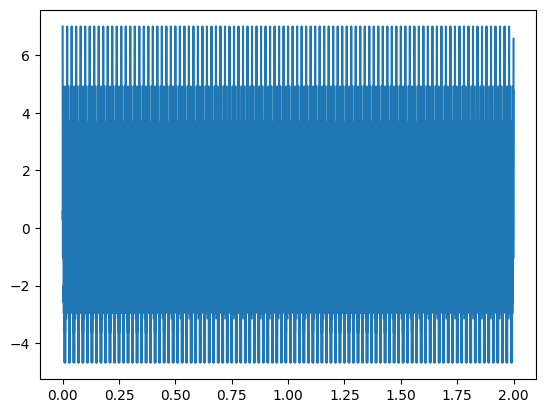

-0.44552789422304506
-12.041199826559248


In [ ]:
# criando o sinal

fs = 10000
ts = 1/fs

t = np.arange(0, 2, ts)

m = 2*np.cos(2*pi*50*t) + np.cos(2*pi*300*t) + 2.5*np.cos(2*pi*500*t) + 1.5*np.cos(2*pi*1000*t)

plt.figure()
plt.plot(t,m)
plt.show()

print(20*np.log10(0.95))
print(20*np.log10(0.25))

1.3766821378739216
87.21288497545324
[np.complex128(-387.47663864500925+387.4766386450093j), np.complex128(-387.47663864500936-387.47663864500925j)]
<TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       3.003e+05
-----------------------
s^2 + 775 s + 3.003e+05



c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


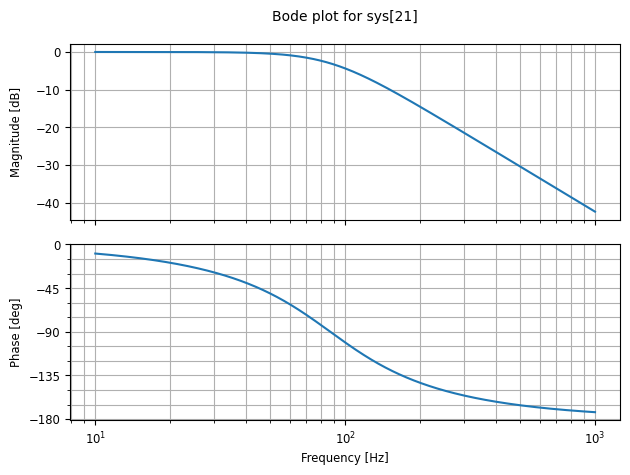

In [ ]:
# Valores do diagrama

wp1 = 2*pi*50
wp2 = 2*pi*1000

ws1 = 2*pi*300
ws2 = 2*pi*500

rp = 0.95
rs = 0.25


# FILTRO PASSA BAIXA
# encontrando a ordem

p1 = (1/(rp**2))-1
s1 = (1/(rs**2))-1

numN = np.log10(p1/s1)
denN = 2*np.log10(wp1/ws1)

N = numN/denN

# N = 1.37, então assumir 2
# Frequencia de corte

N = 2
wc = wp1*(1/(p1))**(1/(2*N))

# wc = 87.21 graus
# Encontrando os polos

k = np.arange(0, 2*N)
polos = wc*np.exp((1j*pi/(2*N))*(2*k+N-1))


POLOS = [p for p in polos if np.real(p)<0]
print(POLOS)

# Função do filtro

pbden = np.poly(POLOS)
Hpb = ctl.tf(wc**N,pbden)
print(Hpb)

plt.figure()
ctl.bode(Hpb, Hz = True, dB = True)

[ 1820.59860062+4395.31383326j -1820.59860062+4395.31383326j
 -4395.31383326+1820.59860062j -4395.31383326-1820.59860062j
 -1820.59860062-4395.31383326j  1820.59860062-4395.31383326j
  4395.31383326-1820.59860062j  4395.31383326+1820.59860062j]
[np.complex128(-1820.5986006239464+4395.31383326381j), np.complex128(-4395.31383326381+1820.5986006239473j), np.complex128(-4395.31383326381-1820.5986006239461j), np.complex128(-1820.5986006239493-4395.313833263809j)]
<TransferFunction>: sys[29]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                             s^4
-------------------------------------------------------------
s^4 + 1.243e+04 s^3 + 7.728e+07 s^2 + 2.814e+11 s + 5.123e+14



c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


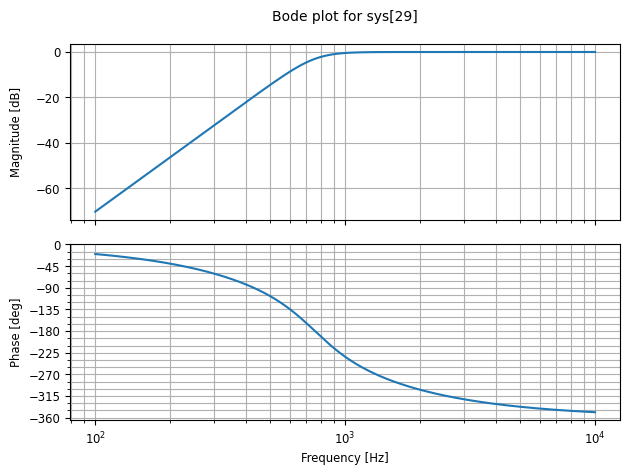

In [ ]:
# FILTRO PASSA ALTA

# Encontrando a ordem do filtro

p1 = (1/(rp**2))-1
s1 = (1/(rs**2))-1

numN = np.log10(p1/s1)
denN = 2*np.log10(wp2/ws2)
N = numN/denN

# Como N = -3.55, assumir -4

N = -4

wc = wp2*(1/(p1))**(1/(2*N))
# wc = 757.17 graus
# Definir N = 4 para encontrar os polos

N = 4

k = np.arange(0, 2*N)
polos = wc*np.exp((1j*pi/(2*N))*(2*k+N-1))
print(polos)

POLOS = [p for p in polos if np.real(p)<0]
print(POLOS)

denH = np.poly(POLOS)

Hpa = ctl.tf([1, 0, 0, 0, 0],denH)
print(Hpa)

plt.figure()
ctl.bode(Hpa, Hz = True, dB = True)


<TransferFunction>: sys[38]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   s^6 + 775 s^5 + 6.006e+05 s^4 + 3.733e+09 s^3 + 2.32e+13 s^2 + 8.449e+16 s + 1.538e+20
--------------------------------------------------------------------------------------------
s^6 + 1.321e+04 s^5 + 8.721e+07 s^4 + 3.45e+11 s^3 + 7.535e+14 s^2 + 4.815e+17 s + 1.538e+20



c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


Ganho em  50  Hz:  0.9500144630464478
Ganho em  300  Hz:  0.08563086959959103
Ganho em  500  Hz:  0.2042781382023878
Ganho em  1000  Hz:  0.9537787403393191


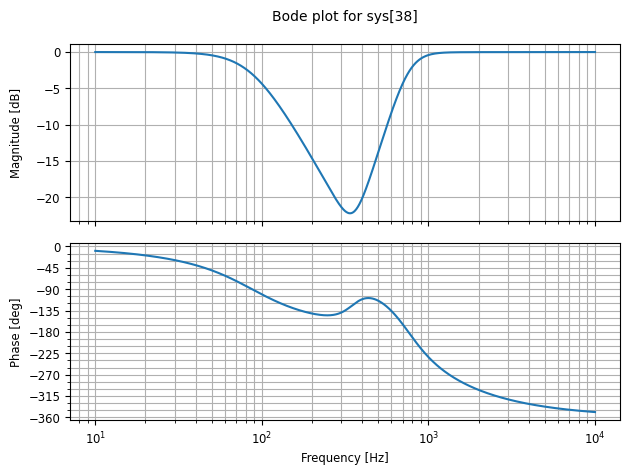

In [ ]:
# FILTRO PASSA FAIXA

Hrf = Hpa+Hpb
print(Hrf)

plt.figure()
ctl.bode(Hrf, Hz = True, dB = True)

# Análise das frequencias críticas

f = [50, 300, 500, 1000]

for f in f:
    K = abs(ctl.evalfr(Hrf, 1j*2*pi*f))
    print('Ganho em ',f,' Hz: ',K)

c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=3.25638e-32): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=3.25638e-32): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=3.23606e-32): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())


<TransferFunction>: sys[38]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.5403 z^6 - 3.197 z^5 + 7.886 z^4 - 10.38 z^3 + 7.686 z^2 - 3.036 z + 0.4996
-----------------------------------------------------------------------------
   z^6 - 4.707 z^5 + 9.318 z^4 - 9.939 z^3 + 6.024 z^2 - 1.965 z + 0.2695

dt = 0.0001



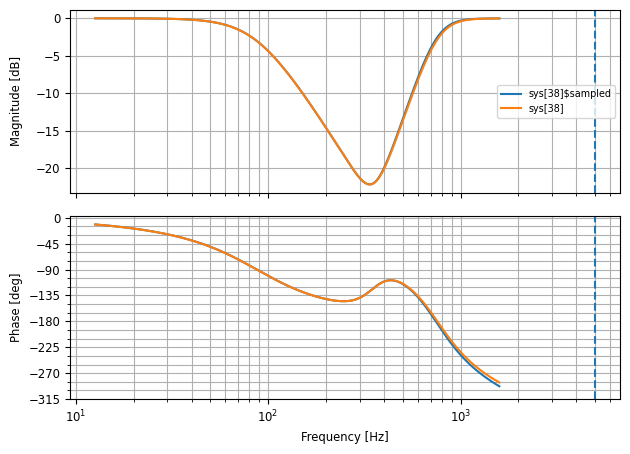

In [ ]:
# TRANSFORMANDO PARA Z

Hz = ctl.c2d(Hrf, ts, method='tustin')
print(Hz)

om = np.logspace(1.9, 4, 1000)

plt.figure()
ctl.bode(Hz, Hz = True, dB = True, omega= om)
ctl.bode(Hrf, Hz = True, dB = True, omega = om)

In [ ]:
# Conferindo as frequencias no modelo discreto

f = [50, 300, 500, 1000]

for f in f:
    K = abs(ctl.evalfr(Hz, np.exp(1j*2*pi*f*ts)))
    print('Ganho em ',f,' Hz:' ,K)
print(20*np.log10(0.25))

num, den = ctl.tfdata(Hz)
num = num[0][0]
den = den[0][0]

print('\n')
print(np.real(num[0]))
print(np.real(num[1]))
print(np.real(num[2]))
print(np.real(num[3]))
print(np.real(num[4]))
print(np.real(num[5]))
print(np.real(num[6]))
print('\n')
print(np.real(den[0]))
print(np.real(den[1]))
print(np.real(den[2]))
print(np.real(den[3]))
print(np.real(den[4]))
print(np.real(den[5]))
print(np.real(den[6]))


Ganho em  50  Hz: 0.949999227783001
Ganho em  300  Hz: 0.08526600376822054
Ganho em  500  Hz: 0.2103608821222619
Ganho em  1000  Hz: 0.9641109402390445
-12.041199826559248


0.5403431597910116
-3.196504566430156
7.885829726591048
-10.379493345826823
7.686000445692168
-3.0356977302855426
0.4996021621836057


1.0
-4.707022369898566
9.31834152949968
-9.939369877174743
6.02394886436686
-1.9653033954691945
0.2694851003912735


In [ ]:
def func (m):

    y=np.zeros(len(m))

    y[0] = 0.5403431597910116*m[0]
    y[1] = 0.5403431597910116*m[1]- 3.196504566430156*m[0]+4.707022369898566*y[0]
    y[2] = 0.5403431597910116*m[2]- 3.196504566430156*m[1]+7.885829726591048*m[0]+4.707022369898566*y[1]-9.31834152949968*y[0]
    y[3] = 0.5403431597910116*m[3]- 3.196504566430156*m[2]+7.885829726591048*m[1]-10.379493345826823*m[0]+4.707022369898566*y[2]-9.31834152949968*y[1]+9.939369877174743*y[0]
    y[4] = 0.5403431597910116*m[4]- 3.196504566430156*m[3]+7.885829726591048*m[2]-10.379493345826823*m[1]+7.686000445692168*m[0]+4.707022369898566*y[3]-9.31834152949968*y[2]+9.939369877174743*y[1]-6.02394886436686*y[0]
    y[5] = 0.5403431597910116*m[5]- 3.196504566430156*m[4]+7.885829726591048*m[3]-10.379493345826823*m[2]+7.686000445692168*m[1]-3.0356977302855426*m[0]+4.707022369898566*y[4]-9.31834152949968*y[3]+9.939369877174743*y[2]-6.02394886436686*y[1]+1.9653033954691945*y[0]

    for k in range(6,len(m)):
        y[k] = 0.5403431597910116*m[k]- 3.196504566430156*m[k-1]+7.885829726591048*m[k-2]-10.379493345826823*m[k-3]+7.686000445692168*m[k-4]-3.0356977302855426*m[k-5]+0.4996021621836057*m[k-6]+4.707022369898566*y[k-1]-9.31834152949968*y[k-2]+9.939369877174743*y[k-3]-6.02394886436686*y[k-4]+1.9653033954691945*y[k-5]-0.2694851003912735*y[k-6]


    return y

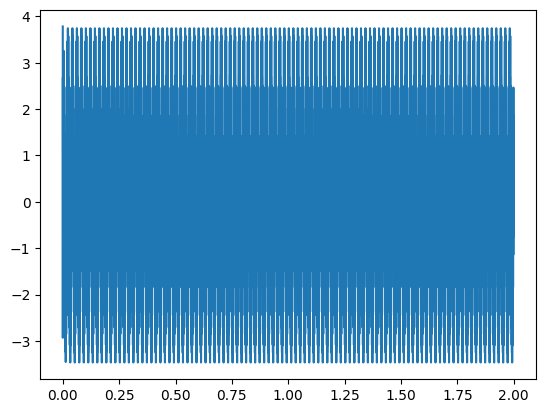

In [ ]:
r = func(m)
plt.figure()
plt.plot(t, r)
plt.show()

<StemContainer object of 3 artists>

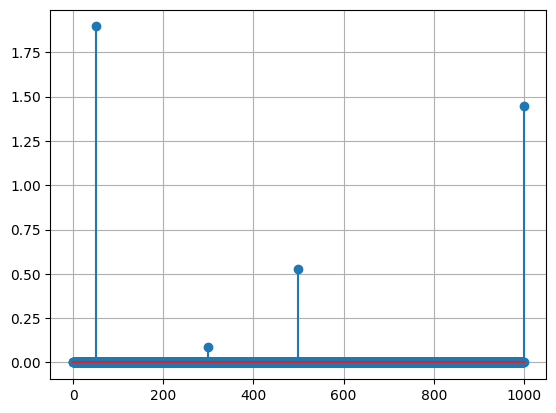

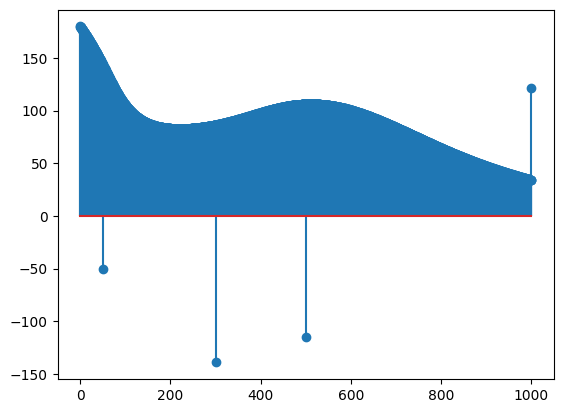

In [ ]:
N = len(r)
S = np.fft.fft(r)
df = fs/N
f = np.arange(0, fs, df)



plt.figure()
plt.clf()
plt.stem(f[0:2001], 2*abs(S[0:2001])/N)
plt.grid()

plt.figure()
Fase = (np.angle( S[0:int(np.floor(N/2))] ) )*180/pi
plt.stem( f[0:2001], Fase[0:2001])


<StemContainer object of 3 artists>

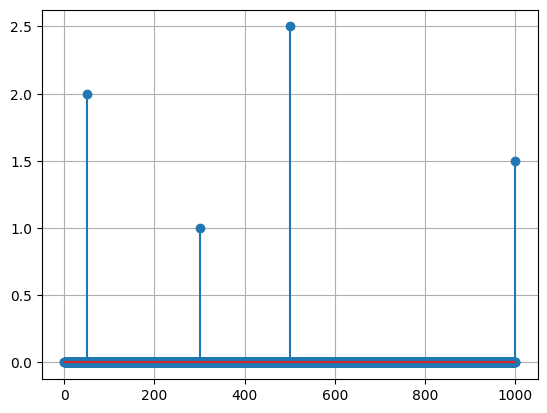

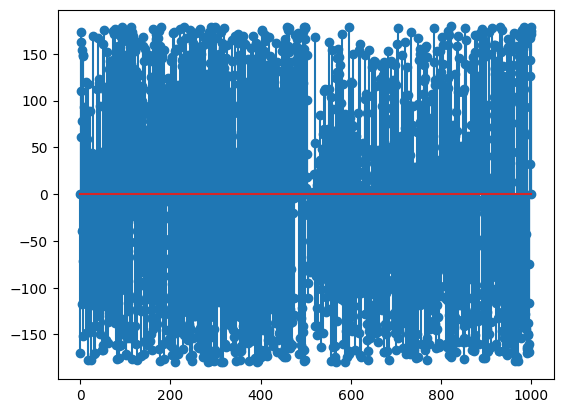

In [ ]:

N = len(m)
S = np.fft.fft(m)
df = fs/N
f = np.arange(0, fs, df)

plt.figure()
plt.stem(f[0:2001], 2*abs(S[0:2001])/N)
plt.grid()

plt.figure()
Fase = (np.angle( S[0:int(np.floor(N/2))] ) )*180/pi
plt.stem( f[0:2001], Fase[0:2001])